# Reclaiming Water Rights on the Gila River

The Gila River Reservation south of Phoenix, AZ is the ancestral home of the [Akimel O'otham and Tohono O’odham tribes](https://www.gilariver.org/index.php). The Gila River area was known for its agriculture, with miles of canals providing irrigation. However, in the 1800s, European colonizers upstream installed dams which cut off water supply. This resulted in the collapse of Gila River agriculture and sky-rocketing rates of diabetes and heart disease in the community as they were forced to subsist only on US government surplus rations.

In 2004, the Gila River community won back much of its water rights in court. The settlement granted senior water rights nearly matching pre-colonial water use. Work has begun to rebuild the agriculture in the Gila River Reservation. According to the Gila River Indian Community, "It will take years to complete but in the end the community members will once again hear the sweet music of rushing water."

![](https://static01.nyt.com/images/2008/08/31/us/31diabetes.600.jpg?quality=75&auto=webp)
> Image source: [New York Times](https://www.nytimes.com/2008/08/31/us/31diabetes.html)

## Observing vegetation health from space
We will look at the recovery of agriculture in the area over the following 19 years using the summertime NDVI (Normalized Difference Vegetation Index). How does it work? First, we need to learn about spectral reflectance signatures.

Every object reflects some wavelengths of light more or less than others. We can see this with our eyes, since, for example, plants reflect a lot of green in the summer, and then as that green diminishes in the fall they look more yellow or orange. The image below shows spectral signatures for water, soil, and vegetation:

![](https://seos-project.eu/remotesensing/images/Reflexionskurven.jpg)
> Image source: [SEOS Project](https://seos-project.eu/remotesensing/remotesensing-c01-p06.html)

Healthy vegetation reflects a lot of Near-InfraRed (NIR) radiation. Less healthy vegetation reflects a similar amounts of the visible light spectra, but less NIR radiation. We don't see a huge drop in Green radiation until the plant is very stressed or dead. That means that NIR allows us to get ahead of what we can see with our eyes.

![](https://camo.githubusercontent.com/176b39433ef30866421bf28988812852b94a7705c75764deebde846560aebbc6/68747470733a2f2f666c75726f7361742e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031382f31302f67726f7774682d6d6f6e69746f72696e672d65313538333930323232383836372e706e6729)
> Image source: [Spectral signature literature review by px39n](https://github.com/px39n/Awesome-Vegetation-Index)

Different species of plants reflect different spectral signatures, but the *pattern* of the signatures are similar. NDVI compares the amount of NIR reflectance to the amount of Red reflectance, thus accounting for many of the species differences and isolating the health of the plant. The formula for calculating NDVI is:

$$NDVI = \frac{(NIR - Red)}{(NIR + Red)}$$

Read more about NDVI and other vegetation indices:
  * [earthdatascience.org](https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/vegetation-indices-in-python/calculate-NDVI-python/)
  * [USGS](https://www.usgs.gov/landsat-missions/landsat-surface-reflectance-derived-spectral-indices)

## Import necessary libraries
In the cell below, making sure to keep the packages in order, add packages for:
  * Working with DataFrames
  * Generating interactive maps
  * Downloading files from the web

&#127798; What are we using the rest of these packages for? See if you can figure it out as you complete the notebook.

In [ ]:
import getpass
import json
import os
import pathlib
import re
import time
from glob import glob

import geopandas as gpd
import matplotlib.pyplot as plt
import rioxarray as rxr
import xarray as xr

We have one more setup task. We're not going to be able to load all our data directly from the web to Python this time. That means we need to set up a place for it.

> **GOTCHA ALERT**: A lot of times in Python we say "directory" to mean a "folder" on your computer. The two words mean the same thing.

&#128187; In the cell below, replace 'data-dir' with a **descriptive** directory name.

In [ ]:
data_dir = os.path.join(pathlib.Path.home(), 'nd-ndvi')
# Make the data directory
os.makedirs(data_dir)

## Study Area: The Gila River Reservation

### Earth Data Science data formats

In Earth Data Science, we get data in three main formats:

|  Data type  |  Descriptions | Common file formats | Python type |
|-------------|---------------|---------------------|-------------|
| Time Series | The same data points (e.g. streamflow) collected multiple times over time | Tabular formats (e.g. .csv, or .xlsx) | pandas DataFrame |
| Vector | Points, lines, and areas (with coordinates) | Shapefile (often an archive like a `.zip` file because a Shapefile is actually a collection of at least 3 files) | geopandas GeoDataFrame |
| Raster | Evenly spaced spatial grid (with coordinates) | GeoTIFF (`.tif`), NetCDF (`.nc`), HDF (`.hdf`)| rioxarray DataArray |

&#128214; Read more about [vector data](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/) and [raster data](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-raster-data/) in the textbook.

&#9998; For this coding challenge, we are interested in the boundaries of American Indian Reservations to define our study area (the Gila River Reservation). In the cell below, answer the following question: **What data type do you think the reservation boundaries will be?**

# YOUR ANSWER HERE

&#128187; Your task:
  * **Search** the [data.gov](https://data.gov/) catalog for "American Indian Tribal Subdivision"
  * Get a link to the file containing Tribal subdivision boundaries as a `.zip` file and **save it as a Python variable**
  * **Load the data into Python** using the `geopandas` library, e.g.:

  ```python
  gpd.read_file(url)
  ```

In [ ]:
# YOUR CODE HERE
raise NotImplementedError

In [ ]:
ans_gdf = _
gdf_pts = 0

if isinstance(ans_gdf, gpd.GeoDataFrame):
    print('\u2705 Great work! You downloaded and opened a GeoDataFrame')
    gdf_pts +=2
else:
    print('\u274C Hmm, your answer is not a GeoDataFrame')

print('\u27A1 You earned {} of 2 points for downloading data'.format(gdf_pts))

### Site Map

The code below will help you to draw the Tribal subdivision boundaries on an interactive map.

&#128187; Your task:
  * Ask ChatGPT [how to plot a shapefile on a folium map](https://chat.openai.com/share/25988d5d-b355-4537-b2a1-71eafc60f67e)
  * Adapt the code to use the boundary data you downloaded

> **GOTCHA ALERT:** Make sure to call your map at the end of the cell so that it will display in your Notebook

&#127798; Customize your plot - can you add ESRI World Imagery as the basemap/background?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError

Notice that we used the `AIANNHCE` attribute in the popup on the map above. That's because the AIANNHCE is a number that indicates which larger reservation each subdivision is a part of.

Your task:
  * Research the Gila River Reservation. Can you find it on your map?
  * Find the AIANNHCE number for the Gila River Reservation and use it to select only subdivisions in that group.
  * Use the `.dissolve()` method of your GeoDataFrame to merge all the subdivisions into one boundary
  * Test your code by plotting the final boundary.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError

## Exploring the AppEEARS API for NASA Earthdata access

Over the next four cells, you will download MODIS NDVI data for the study period. MODIS is a multispectral instrument that measures Red and NIR data (and so can be used for NDVI). There are two MODIS sensors on two different platforms: satellites Terra and Aqua.

&#128214; [Learn more about MODIS datasets and science](https://modis.gsfc.nasa.gov/)

Since we're asking for a special download that only covers our study area, we can't just find a link to the data - we have to negotiate with the data server. We're doing this using the [APPEEARS](https://appeears.earthdatacloud.nasa.gov/api/) API (Application Programming Interface). The API makes it possible for you to request data using code. The steps of your conversation with the data server will be:
  1. **Log in** so the server knows who you are
  2. **Submit** your data request
  3. **Wait** until the server has processed your request and your data is ready
  4. **Download** the files containing your request.

&#128187; Often when we want to do something more complex in coding we find an example and modify it. This download code is already almost a working example. Your task will be:
  * Enter your NASA Earthdata username and password when prompted
  * Replace the start and end dates in the task parameters. You will want as many years of data as you can get!
  * Replace `gdf` with the name of **your** site geodataframe. 

> **GOTCHA ALERT** make sure to use only the boundary of the Gila River Reservation, and not the full boundary of all subdivisions! You don't want to download too much data you don't need and run out of space.

&#127798; What would the product and layer name be if you were trying to download Landsat Surface Temperature Analysis Ready Data (ARD) instead of MODIS NDVI?

### 1. Log in to the Earthdata AppEEARS API

In [ ]:
# Ask for the user's username and password
username = input('NASA Earthdata Username: ')
password = getpass.getpass('NASA Earthdata Password: ')

# Set up authentication and submit login request
s = requests.Session()
s.auth = (username, password)
login_resp = s.post("https://appeears.earthdatacloud.nasa.gov/api/login")

# Set up the authorization header with the new token to use in later commands
auth_header = (
    '{token_type} {token}'
    .format(**login_resp.json()))

### 2. Submit the task request

In [ ]:
# Task parameters
task = {
    'task_type': 'area',
    'task_name': 'nd-ndvi',
    'params': {
        'dates': [
            {
                'startDate': '01-01-2020',
                'endDate': '12-31-2001'
            }
        ],
        'layers': [
            {
                'product': 'MOD13Q1.061',
                'layer': '_250m_16_days_NDVI'
            }
        ],
        # Need subdivisions as json, not as a string
        "geo": json.loads(gdf.envelope.to_json()), 
        "output": {
            "format": {"type": "geotiff"}, 
            "projection": "geographic"
        }
    }
}

# Submit the task request
task_response = requests.post(
    'https://appeears.earthdatacloud.nasa.gov/api/task', 
    json=task, 
    headers={'Authorization': auth_header})

# We need the task ID for later
task_id = task_response.json()['task_id'] 

### Wait for the download preparation task to complete

In [ ]:
status = 'initializing'
while status != 'done':
    # Wait 20 seconds in between status checks
    if status != 'initializing':
        time.sleep(20)

    # Check status
    status_response = requests.get(
        'https://appeears.earthdatacloud.nasa.gov/api/status/{}'
        .format(task_id), 
        headers={'Authorization': auth_header})
    
    # Update status
    if 'progress' in status_response.json():
        status = status_response.json()['progress']['summary']
    elif 'status' in status_response.json():
        status = status_response.json()['status']
    print(status)

### Download files

In [ ]:

# Get file download information
bundle_response = requests.get(
    'https://appeears.earthdatacloud.nasa.gov/api/bundle/{}'
    .format(task_id),
    headers={'Authorization': auth_header}
)
files = bundle_response.json()['files']

'{} files available for download'.format(len(files))

# Download files
for file_info in files:
    # Get a stream to the bundle file
    response = requests.get( 
        'https://appeears.earthdatacloud.nasa.gov/api/bundle/{}/{}'
        .format(task_id, file_info['file_id']),  
        headers={'Authorization': auth_header}, 
        allow_redirects=True,
        stream=True
    ) 

    # Create a destination directory to store the file in
    filepath = os.path.join(nd_ndvi_dir, file_info['file_name'])
    if not os.path.exists(os.path.dirname(filepath)):
        os.makedirs(os.path.dirname(filepath))

    # Write the file to the destination directory
    print('Downloading file {}'.format(filepath))
    with open(filepath, 'wb') as f:
        for data in response.iter_content(chunk_size=8192):
            f.write(data)

## Putting it together: Working with multi-file raster datasets in Python

Now you need to load all the downloaded files into Python. Let's start by getting all the file names. You will also need to extract the date from the filename. Check out [the lesson on getting information from filenames in the textbook](https://www.earthdatascience.org/courses/intro-to-earth-data-science/write-efficient-python-code/loops/data-workflows-with-loops/).

> **GOTCHA ALERT:** `glob` doesn't necessarily find files in the order you would expect. Make sure to **sort** your file names like it says in the textbook.

In [9]:
# YOUR CODE HERE
raise NotImplementedError

### Repeating tasks in Python

Now you should have over 100 files! For each file, you need to:
  * Filter only files from the summer months, where irrigation makes the most difference
  * Load the file in using the `rioxarray` library
  * Get the date from the file name
  * Add the date as a dimension coordinate
  * Give your data variable a name
  * Divide by the scale factor of 10000

You don't want to write out the code for each file! That's a recipe for copy pasta. Luckily, Python has tools for doing similar tasks repeatedly. In this case, you'll use one called a `for` loop.

There's some code below that uses a `for` loop in what is called an **accumulation pattern** to process each file. That means that you will save the results of your processing to a list each time you process the files, and then merge all the arrays in the list. 

Your task is to:
  * Look at the file names. How many characters from the end is the date?
  * Replace any required variable names with your chosen variable names
  * Define the `summer_months` variable to include the correct months
  * Change the `scale_factor` variable to be the correct scale factor for this NDVI dataset (HINT: NDVI should range between 0 and 1)
  * Using indices or regular

In [12]:
summer_months = []
scale_factor = 1
doy_start = -1
doy_end = -1

ndvi_das = []
for ndvi_path in ndvi_paths:
    # Get date from file name
    doy = ndvi_path[doy_start:doy_end]
    date = pd.to_datetime(doy, format='%Y%j')

    # Skip non-summer months
    if not (date.month_name() in summer_months):
        continue

    # Open dataset
    da = rxr.open_rasterio(ndvi_path, masked=True).squeeze()

    # Add date dimension and clean up metadata
    da = da.assign_coords({'date': date})
    da = da.expand_dims({'date': 1})
    da.name = 'NDVI'

    # Multiple by scale factor
    da = da / scale_factor

    # Prepare for concatenation
    ndvi_das.append(da)

len(ndvi_das)
# END SOLUTION

138

Next, stack your arrays by date into a time series using the `xr.combine_by_coords()` function. You will have to tell it which dimension you want to stack your data in.

In [13]:
# YOUR CODE HERE
raise NotImplementedError

<xarray.Dataset>
Dimensions:      (x: 382, y: 203, date: 138)
Coordinates:
    band         int64 1
  * x            (x) float64 -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97 32.97
    spatial_ref  int64 0
  * date         (date) datetime64[ns] 2000-06-09 2000-06-25 ... 2022-08-29
Data variables:
    NDVI         (date, y, x) float32 0.6479 0.4558 0.5603 ... 0.2146 0.2085

### Plot the change in NDVI spatially

Complete the following:
  * Select data from 2012 to 2022
  * Take the temporal mean (over the **date**, not spatially)
  * Get the NDVI variable (should be a DataArray, not a Dataset)
  * Repeat for the data from 2002 to 2012
  * Subtract the 2002-2012 decade from the 2012-2022 decade
  * Plot the result using a **diverging** color map like `cmap=plt.cm.PiYG`

> There are different types of color maps for different types of data. In this case, we want decreases to be a different color from increases, so we use a **diverging** color map. Check out available colormaps in the [matplotlib documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

&#127798; For an extra challenge, add the Gila River Reservation boundary to the plot

In [ ]:
# YOUR CODE HERE
raise NotImplementedError

# Is the NDVI higher in the Gila River Reservation since the water rights settlement?

You will compute the mean NDVI inside and outside the reservation. First, use the code below to get a `GeoDataFrame` of the area outside the Reservation. Your task:
  * Check the variable names - Make sure that the code uses your boundary `GeoDataFrame`
  * How could you test if the geometry was modified correctly? Add some code to take a look at the results.

In [ ]:
out_gdf = (
    gpd.GeoDataFrame(geometry=gila_gdf.envelope)
    .overlay(gila_gdf, how='difference'))


Next, clip your DataArray to the boundaries for both inside and outside the reservation. You will need to replace the `GeoDataFrame` name with your own. Check out the [lesson on clipping data with the `rioxarray` library in the textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/).

> **GOTCHA ALERT:** It's important to use `from_disk=True` when clipping large arrays like this. It allows the computer to use less valuable memory resources when clipping - you will probably find that otherwise the cell below crashes the kernel

<Axes: >

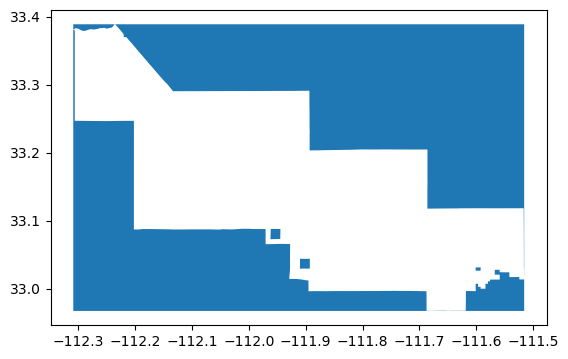

In [14]:
# YOUR CODE HERE
raise NotImplementedError

For **both inside and outside** the Gila River Reservation:
  * Group the data by year
  * Take the mean. You always need to tell reducing methods in `xarray` what dimensions you want to reduce. When you want to summarize data across **all** dimensions, you can use the `...` syntax, e.g. `.mean(...)` as a shorthand.
  * Select the NDVI variable
  * Convert to a DataFrame using the `to_dataframe()` method

> **GOTCHA ALERT:** the DateIndex in pandas is a little different from the Datetime Dimension in xarray. You will need to use the `.dt.year` syntax to access information about the year, not just `.year`.

Then, plot annual summertime means for both inside and outside the Reservation on the same plot using your pandas or matplotlib plotting skills.

<Axes: xlabel='year'>

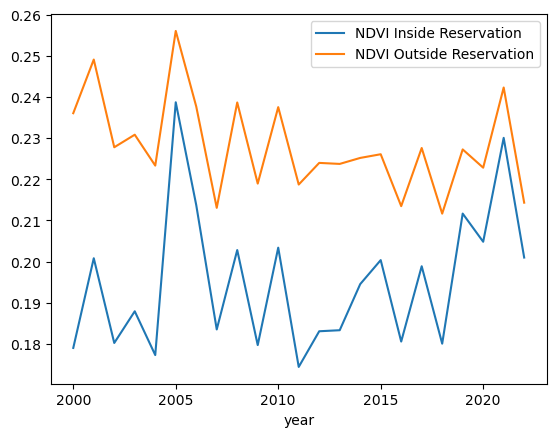

In [15]:
# YOUR CODE HERE
raise NotImplementedError

Now, take the difference between outside and inside the Reservation and plot that. What do you observe? Don't forget to write a headline and description of your plot!

In [ ]:
# YOUR CODE HERE
raise NotImplementedError

# YOUR ANSWER HERE

## Your turn! Repeat this workflow in a different time and place.

It's not just water rights that affect NDVI! You could look at: 
  * Recovery after a national disaster, like a wildfire or hurricane
  * The effects of drought on crop health
  * Deforestation

You can even choose a different dataset, like Landsat, and/or a different spectral index. [Check out some other ways to enhance images and highlight different phenomena](https://www.usgs.gov/landsat-missions/landsat-surface-reflectance-derived-spectral-indices)